# Scaling relation script

In [1]:
# Basics
import numpy as np
import pandas as pd
import os

# Scipy
from scipy import optimize
from scipy.ndimage import gaussian_filter
#from sklearn.neighbors import KDTree
from scipy import stats

# Plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator, MaxNLocator
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
import matplotlib.colors as mcolors
from matplotlib import colors
import matplotlib.ticker as ticker
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

# RC params
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
rcParams["axes.edgecolor"] = 'black'
rcParams["legend.edgecolor"] = '0.8'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [2]:
def prep_array(scale):
    scale = scale.assign(gc_5 = scale.old_5 + scale.new_5)
    scale = scale.assign(gc_10 = scale.old_10 + scale.new_10)
    scale = scale.assign(gc_20 = scale.old_20 + scale.new_20)

    scale = scale.assign(log_gc_5  = np.log10(scale.gc_5))
    scale = scale.assign(log_gc_10 = np.log10(scale.gc_10))
    scale = scale.assign(log_gc_20 = np.log10(scale.gc_20))

    scale = scale.assign(f_2g_5  = scale.new_5/scale.gc_5)
    scale = scale.assign(f_2g_10 = scale.new_10/scale.gc_10)
    scale = scale.assign(f_2g_20 = scale.new_20/scale.gc_20)

    scale = scale.assign(f_1g_20 = scale.old_20/scale.gc_20)
    scale = scale.assign(f_1g_10 = scale.old_10/scale.gc_10)
    scale = scale.assign(f_1g_5 = scale.old_5/scale.gc_5)

    scale.new_vx = abs(scale.new_vx)
    scale.new_vy = abs(scale.new_vy)
    scale.new_vz = abs(scale.new_vz)
    
    return scale

In [3]:
hole = pd.read_csv('HI_holes.csv')
no_hole = pd.read_csv('No_HI_holes.csv')
lsb = pd.read_csv('LSB.csv')
fid =  pd.read_csv('Fid.csv')

hole = prep_array(hole)
no_hole = prep_array(no_hole)
lsb = prep_array(lsb)
fid = prep_array(fid)

fit_data = pd.concat([no_hole,fid]) #fit to fid as well


slope: -0.503680    intercept: 3.418452
R-squared: 0.531144
r value: -0.728796
P value:  6.895660313018318e-07
slope: -0.448636    intercept: 3.136632
R-squared: 0.590589
r value: -0.768498
P value:  7.0168082333545e-08
slope: -0.403036    intercept: 2.851693
R-squared: 0.753020
r value: -0.867767
P value:  3.0623342522139005e-11


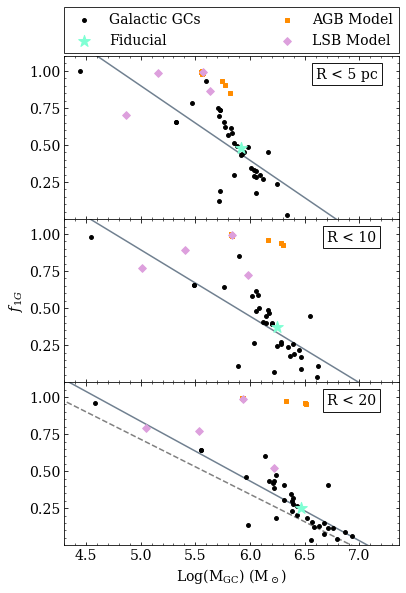

In [4]:
fit_line = np.linspace(4, 7.2, num=50)

slope0, intercept0, r_value0, p_value0, std_err0 = stats.linregress(fit_data.log_gc_5, fit_data.f_1g_5)
print("slope: %f    intercept: %f" % (slope0, intercept0))
print("R-squared: %f" % r_value0**2)
print("r value: %f" % r_value0)
print("P value: ", p_value0)


slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(fit_data.log_gc_10, fit_data.f_1g_10)
print("slope: %f    intercept: %f" % (slope1, intercept1))
print("R-squared: %f" % r_value1**2)
print("r value: %f" % r_value1)
print("P value: ", p_value1)


slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(no_hole.log_gc_20, no_hole.f_1g_20)
print("slope: %f    intercept: %f" % (slope2, intercept2))
print("R-squared: %f" % r_value2**2)
print("r value: %f" % r_value2)
print("P value: ", p_value2)


props = dict(facecolor='white',alpha=0.9) 
text_x = 6.7
text_y = 0.95

fig, ax = plt.subplots(3,1, sharex = True, sharey = True)
fig.set_size_inches(6, 9)



ax[0].scatter(no_hole.log_gc_5, no_hole.f_1g_5, color='black', label='Galactic GCs', s=15)
ax[0].scatter(fid.log_gc_5, fid.f_1g_5, color='aquamarine', label='Fiducial', marker="*", s=150)
ax[0].scatter(hole.log_gc_5, hole.f_1g_5, color='darkorange', label='AGB Model', marker="s", s=20)
ax[0].scatter(lsb.log_gc_5, lsb.f_1g_5, color='plum', label='LSB Model', marker="D", s=30)
ax[0].plot(fit_line, intercept0 + slope0*fit_line, color = 'slategrey', zorder = -1)

ax[0].set_xlabel(r"Log($\rm{M}_{\rm{GC}}$) (M$_\odot$)")
#ax[0].set_ylabel("$f_{1G}$")
ax[0].tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].set_ylim(bottom = 0, top = 1.1)
ax[0].yaxis.set_major_locator(MaxNLocator(nbins='auto',prune='lower')) # added 
ax[0].text(text_x-0.1, text_y, 'R < 5 pc', bbox=props)


ax[1].scatter(no_hole.log_gc_10, no_hole.f_1g_10, color='black', label='Galactic GCs', s=15)
ax[1].scatter(fid.log_gc_10, fid.f_1g_10, color='aquamarine', label='Fiducial Model', marker="*", s=150)
ax[1].scatter(hole.log_gc_10, hole.f_1g_10, color='darkorange', label='LSB Model', marker="s", s=20)
ax[1].scatter(lsb.log_gc_10, lsb.f_1g_10, color='plum', label='LSB Model', marker="D", s=30)
ax[1].plot(fit_line, intercept1 + slope1*fit_line, color = 'slategrey', label='fitted line', zorder = -1)

ax[1].set_xlabel(r"Log($\rm{M}_{\rm{GC}}$) (M$_\odot$)")
ax[1].set_ylabel("$f_{1G}$")
ax[1].tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax[1].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1].set_ylim(bottom = 0, top = 1.1)
ax[1].yaxis.set_major_locator(MaxNLocator(nbins='auto',prune='lower')) # added 
ax[1].text(text_x, text_y, 'R < 10', bbox=props)


ax[2].scatter(no_hole.log_gc_20, no_hole.f_1g_20, color='black', label='Galactic GCs', s=15)
ax[2].scatter(fid.log_gc_20, fid.f_1g_20, color='aquamarine', label='Fiducial Model', marker="*", s=150)
ax[2].scatter(hole.log_gc_20, hole.f_1g_20, color='darkorange', label='LSB Model', marker="s", s=20)
ax[2].scatter(lsb.log_gc_20, lsb.f_1g_20, color='plum', label='LSB Model', marker="D", s=30)
ax[2].plot(fit_line, intercept2 + slope2*fit_line, color = 'slategrey', label='fitted line', zorder = -1)


# Milone line
#ax[2].plot(fit_line, 2.126 -0.292*fit_line, color = 'limegreen', linestyle = '--', zorder = -1)

#Baumgardt line all clusters
#ax[2].plot(fit_line, 2.771 -0.4031*fit_line, color = 'red', linestyle = '--', zorder = -1)

#Baumgardt line only circles
ax[2].plot(fit_line, 2.57 -0.371*fit_line, color = 'grey', linestyle = '--', zorder = -1)

#ax[2].plot(fit_line, 2.26 -0.3202*fit_line, zorder = -1)

ax[2].set_xlabel(r"Log($\rm{M}_{\rm{GC}}$) (M$_\odot$)")
#ax[2].set_ylabel("$f_{1G}$")
ax[2].tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax[2].yaxis.set_minor_locator(AutoMinorLocator())
ax[2].xaxis.set_minor_locator(AutoMinorLocator())
ax[2].set_ylim(bottom = 0, top = 1.1)
ax[2].set_xlim(left = 4.3)
ax[2].text(text_x, text_y, 'R < 20', bbox=props)

plt.subplots_adjust(wspace=0, hspace=0)
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0., edgecolor='0', fancybox=False, frameon=True)

plt.savefig('f_1G_scale.png', bbox='tight', dpi = 300)
plt.show()

slope: 2.553243    intercept: -11.441790
R-squared: 0.967832
r value: 0.983784
P value:  1.0530329111287467e-05
slope: 1.476696    intercept: -3.211752
R-squared: 0.974728
r value: 0.987283
P value:  6.138298085745873e-28


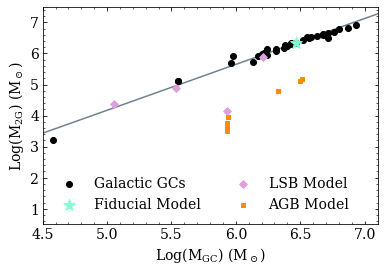

In [12]:
x_data = np.log10(fit_data.gc_20)
y_data = np.log10(fit_data.new_20)
#x_data = no_hole.gc_20
#y_data = no_hole.new_20

fit_line = np.linspace(4.5, 7.1, num=50)
slope1, intercept1, r_value1, p_value1, std_err = stats.linregress(np.log10(hole.gc_20), np.log10(hole.new_20))
print("slope: %f    intercept: %f" % (slope1, intercept1))
print("R-squared: %f" % r_value1**2)
print("r value: %f" % r_value1)
print("P value: ", p_value1)



fit_line = np.linspace(4.5, 7.1, num=50)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
print("r value: %f" % r_value)
print("P value: ", p_value)

LSB = 54

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
plt.scatter(x_data, y_data, color='black', label='Galactic GCs')
plt.scatter(np.log10(fid.gc_20), np.log10(fid.new_20), color='aquamarine', label='Fiducial Model', marker="*", s=150)
plt.scatter(np.log10(lsb.gc_20), np.log10(lsb.new_20), color='plum', label='LSB Model', marker="D", s=30)
plt.scatter(np.log10(hole.gc_20), np.log10(hole.new_20),  color='darkorange', label='AGB Model', marker="s", s=20)
plt.plot(fit_line, intercept + slope*fit_line, color = 'slategrey', zorder = -1)
#plt.plot(fit_line, intercept1 + slope1*fit_line, color = 'orange', zorder = -1)
ax.set_xlabel(r"Log($\rm{M}_{\rm{GC}}$) (M$_\odot$)")
ax.set_ylabel(r"Log($\rm{M}_{\rm{2G}}$) (M$_\odot$)")
ax.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.legend(fancybox=False, frameon=False, ncol=2)
ax.set_ylim(bottom = 0.5, top = 7.5)
ax.set_xlim(left = 4.5, right = 7.1)

plt.savefig('2G_GC.png', bbox='tight', dpi = 300)
plt.show()

slope: 7.544455    intercept: -39.236059
R-squared: 0.636570
r value: 0.797853
P value:  9.497038147246281e-09
slope: 7.834005    intercept: -41.342251
R-squared: 0.508107
r value: 0.712816
P value:  1.5522603001658018e-06
slope: 0.270834    intercept: -0.966177
R-squared: 0.052139
r value: 0.228339
P value:  0.187062510391562


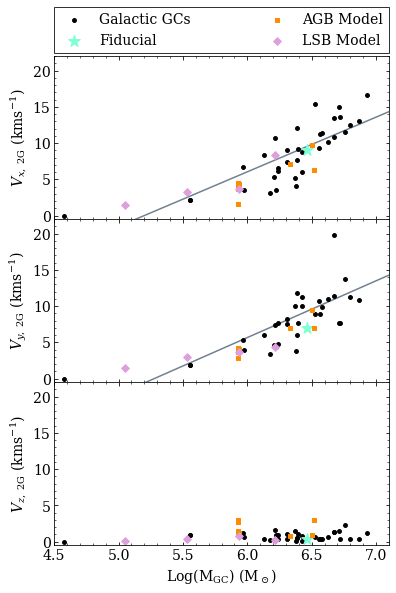

In [29]:
fit_line = np.linspace(4, 7.1, num=50)

slope0, intercept0, r_value0, p_value0, std_err0 = stats.linregress(fit_data.log_gc_20, fit_data.new_vx)
print("slope: %f    intercept: %f" % (slope0, intercept0))
print("R-squared: %f" % r_value0**2)
print("r value: %f" % r_value0)
print("P value: ", p_value0)


slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(fit_data.log_gc_20, fit_data.new_vy)
print("slope: %f    intercept: %f" % (slope1, intercept1))
print("R-squared: %f" % r_value1**2)
print("r value: %f" % r_value1)
print("P value: ", p_value1)


slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(fit_data.log_gc_20, fit_data.new_vz)
print("slope: %f    intercept: %f" % (slope2, intercept2))
print("R-squared: %f" % r_value2**2)
print("r value: %f" % r_value2)
print("P value: ", p_value2)


props = dict(facecolor='white',alpha=0.9) 
text_x = 6.7
text_y = 0.95

fig, ax = plt.subplots(3,1, sharex = True)
fig.set_size_inches(6, 9)
top_y = 22


ax[0].scatter(no_hole.log_gc_20, no_hole.new_vx, color='black', label='Galactic GCs', s=15)
ax[0].scatter(fid.log_gc_20, fid.new_vx, color='aquamarine', label='Fiducial', marker="*", s=150)
ax[0].scatter(hole.log_gc_20, hole.new_vx, color='darkorange', label='AGB Model', marker="s", s=20)
ax[0].scatter(lsb.log_gc_20, lsb.new_vx, color='plum', label='LSB Model', marker="D", s=30)
ax[0].plot(fit_line, intercept0 + slope0*fit_line, color = 'slategrey', zorder = -1)

ax[0].set_xlabel(r"Log($\rm{M}_{\rm{GC}}$) (M$_\odot$)")
#ax[0].set_ylabel("$f_{1G}$")
ax[0].tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
#ax[0].set_ylim(bottom = -0.5)
ax[0].set_ylim(bottom = -0.5, top = top_y)
ax[0].yaxis.set_major_locator(MaxNLocator(nbins='auto',prune='lower')) # added 
#ax[0].text(text_x, text_y, 'R < 5  ', bbox=props)
ax[0].set_ylabel(r"$V_{x,\ \rm{2G}}$ (km$\rm{s}^{-1}$)")


ax[1].scatter(no_hole.log_gc_20, no_hole.new_vy, color='black', label='Galactic GCs', s=15)
ax[1].scatter(fid.log_gc_20, fid.new_vy, color='aquamarine', label='Fiducial Model', marker="*", s=150)
ax[1].scatter(hole.log_gc_20, hole.new_vy, color='darkorange', label='LSB Model', marker="s", s=20)
ax[1].scatter(lsb.log_gc_20, lsb.new_vy, color='plum', label='LSB Model', marker="D", s=30)
ax[1].plot(fit_line, intercept1 + slope1*fit_line, color = 'slategrey', label='fitted line', zorder = -1)

ax[1].set_xlabel(r"Log($\rm{M}_{\rm{GC}}$) (M$_\odot$)")
ax[1].set_ylabel(r"$V_{y,\ \rm{2G}}$ (km$\rm{s}^{-1}$)")
ax[1].tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax[1].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].xaxis.set_minor_locator(AutoMinorLocator())
#ax[1].set_ylim(bottom = -0.5)
ax[1].set_ylim(bottom = -0.5, top = top_y)
ax[1].yaxis.set_major_locator(MaxNLocator(nbins='auto',prune='lower')) # added 
#ax[1].text(text_x, text_y, 'R < 10', bbox=props)


ax[2].scatter(no_hole.log_gc_20, no_hole.new_vz, color='black', label='Galactic GCs', s=15)
ax[2].scatter(fid.log_gc_20, fid.new_vz, color='aquamarine', label='Fiducial Model', marker="*", s=150)
ax[2].scatter(hole.log_gc_20, hole.new_vz, color='darkorange', label='LSB Model', marker="s", s=20)
ax[2].scatter(lsb.log_gc_20, lsb.new_vz, color='plum', label='LSB Model', marker="D", s=30)
#ax[2].plot(fit_line, intercept2 + slope2*fit_line, color = 'slategrey', label='fitted line', zorder = -1)

ax[2].set_xlabel(r"Log($\rm{M}_{\rm{GC}}$) (M$_\odot$)")
#ax[2].set_ylabel("$f_{1G}$")
ax[2].tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax[2].yaxis.set_minor_locator(AutoMinorLocator())
ax[2].xaxis.set_minor_locator(AutoMinorLocator())
ax[2].set_ylim(bottom = -0.5, top = top_y)
ax[2].set_xlim(left = 4.5, right = 7.1)
#ax[2].text(text_x, text_y, 'R < 20', bbox=props)
ax[2].set_ylabel(r"$V_{z,\ \rm{2G}}$ (km$\rm{s}^{-1}$)")

plt.subplots_adjust(wspace=0, hspace=0)
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0., edgecolor='0', fancybox=False, frameon=True)

plt.savefig('vel_scale.png', bbox='tight', dpi = 300)
plt.show()

In [19]:
no_hole.log_gc_20.shape

(34,)

In [6]:
slope0, intercept0, r_value0, p_value0, std_err0 = stats.linregress(fit_data.log_gc_20, (fit_data.new_vx- fit_data.old_vx))
print("slope: %f    intercept: %f" % (slope0, intercept0))
print("R-squared: %f" % r_value0**2)
print("r value: %f" % r_value0)
print("P value: ", p_value0)


slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(fit_data.log_gc_20, (fit_data.new_vy- fit_data.old_vz))
print("slope: %f    intercept: %f" % (slope1, intercept1))
print("R-squared: %f" % r_value1**2)
print("r value: %f" % r_value1)
print("P value: ", p_value1)


slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(fit_data.log_gc_20, (fit_data.new_vz- fit_data.old_vz))
print("slope: %f    intercept: %f" % (slope2, intercept2))
print("R-squared: %f" % r_value2**2)
print("r value: %f" % r_value2)
print("P value: ", p_value2)

slope: 9.001040    intercept: -45.941047
R-squared: 0.639250
r value: 0.799531
P value:  8.389096652356032e-09
slope: 7.996118    intercept: -42.378798
R-squared: 0.507942
r value: 0.712701
P value:  1.5610859913679302e-06
slope: 0.432947    intercept: -2.002724
R-squared: 0.113953
r value: 0.337569
P value:  0.04734491991608489
